In [74]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import numpy as np
import pandas as pd
from keras.models import Sequential, Model
from keras.layers import LSTM, RepeatVector

In [75]:
cwd = os.getcwd()
path = cwd[0:len(cwd)-(len(cwd.split("/")[-1]))] + "data/realAdExchange"

In [76]:
cpc_2_df = pd.read_csv(path+"/exchange-2_cpc_results.csv")
cpc_2_df.head()
cpc_2_df.timestamp = pd.to_datetime(cpc_2_df.timestamp)
cpc_2_df.index = cpc_2_df.timestamp

In [123]:
def gen(sequence_length,arr):
    batch_x = []
    for i in range(int(len(arr)/sequence_length)-1):
        x1 = np.array(arr[sequence_length*i:sequence_length*(i+1)]).reshape((-1,1))
        batch_x.append(x1)
    batch_x = np.array(batch_x)
    return batch_x

def gen_with_skip(sequence_length,skip,arr):
    batch_x = []
    count = 0
    while(count<len(arr)):
        x1 = np.array(arr[sequence_length*i:sequence_length*(i+1)]).reshape((-1,1))
    for i in range(int(len(arr)/sequence_length)-1):
        x1 = np.array(arr[sequence_length*i:sequence_length*(i+1)]).reshape((-1,1))
        batch_x.append(x1)
    batch_x = np.array(batch_x)
    return batch_x

In [124]:
sequence_length = 20
skip_values = 3
latent_dimension = 5
X_train = gen(sequence_length,cpc_2_df.value.values)

In [125]:
X_train.shape[:]
batch_size = X_train.shape[0]

In [126]:
m = Sequential()
m.add(LSTM(latent_dimension, input_shape=(sequence_length, 1)))
m.add(RepeatVector(sequence_length))
m.add(LSTM(1, return_sequences=True))
print(m.summary())
m.compile(loss='mse', optimizer='adam')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_35 (LSTM)               (None, 5)                 140       
_________________________________________________________________
repeat_vector_16 (RepeatVect (None, 20, 5)             0         
_________________________________________________________________
lstm_36 (LSTM)               (None, 20, 1)             28        
Total params: 168
Trainable params: 168
Non-trainable params: 0
_________________________________________________________________
None


In [127]:
history = m.fit(X_train, X_train, nb_epoch=1000, batch_size=batch_size)

/home/abdulliaqat/anaconda3/lib/python3.6/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/1000
80/80 [==============================] - 2s 24ms/step - loss: 0.0106
Epoch 2/1000
80/80 [==============================] - 0s 329us/step - loss: 0.0103
Epoch 3/1000
80/80 [==============================] - 0s 377us/step - loss: 0.0100
Epoch 4/1000
80/80 [==============================] - 0s 336us/step - loss: 0.0098
Epoch 5/1000
80/80 [==============================] - 0s 335us/step - loss: 0.0095
Epoch 6/1000
80/80 [==============================] - 0s 325us/step - loss: 0.0092
Epoch 7/1000
80/80 [==============================] - 0s 311us/step - loss: 0.0090
Epoch 8/1000
80/80 [==============================] - 0s 298us/step - loss: 0.0087
Epoch 9/1000
80/80 [==============================] - 0s 362us/step - loss: 0.0085
Epoch 10/1000
80/80 [==============================] - 0s 403us/step - loss: 0.0082
Epoch 11/1000
80/80 [==============================] - 0s 434us/step - loss: 0.0080
Epoch 12/1000
80/80 [==============================] - 0s 403us/step - loss: 0.0077
Ep

Epoch 99/1000
80/80 [==============================] - 0s 367us/step - loss: 0.0013
Epoch 100/1000
80/80 [==============================] - 0s 319us/step - loss: 0.0013
Epoch 101/1000
80/80 [==============================] - 0s 315us/step - loss: 0.0013
Epoch 102/1000
80/80 [==============================] - 0s 299us/step - loss: 0.0013
Epoch 103/1000
80/80 [==============================] - 0s 256us/step - loss: 0.0013
Epoch 104/1000
80/80 [==============================] - 0s 309us/step - loss: 0.0013
Epoch 105/1000
80/80 [==============================] - 0s 303us/step - loss: 0.0013
Epoch 106/1000
80/80 [==============================] - 0s 341us/step - loss: 0.0013
Epoch 107/1000
80/80 [==============================] - 0s 337us/step - loss: 0.0013
Epoch 108/1000
80/80 [==============================] - 0s 318us/step - loss: 0.0013
Epoch 109/1000
80/80 [==============================] - 0s 321us/step - loss: 0.0013
Epoch 110/1000
80/80 [==============================] - 0s 349us/s

Epoch 196/1000
80/80 [==============================] - 0s 363us/step - loss: 0.0012
Epoch 197/1000
80/80 [==============================] - 0s 369us/step - loss: 0.0012
Epoch 198/1000
80/80 [==============================] - 0s 299us/step - loss: 0.0012
Epoch 199/1000
80/80 [==============================] - 0s 369us/step - loss: 0.0012
Epoch 200/1000
80/80 [==============================] - 0s 349us/step - loss: 0.0012
Epoch 201/1000
80/80 [==============================] - 0s 369us/step - loss: 0.0012
Epoch 202/1000
80/80 [==============================] - 0s 283us/step - loss: 0.0012
Epoch 203/1000
80/80 [==============================] - 0s 437us/step - loss: 0.0012
Epoch 204/1000
80/80 [==============================] - 0s 299us/step - loss: 0.0012
Epoch 205/1000
80/80 [==============================] - 0s 261us/step - loss: 0.0012
Epoch 206/1000
80/80 [==============================] - 0s 354us/step - loss: 0.0012
Epoch 207/1000
80/80 [==============================] - 0s 349us/

Epoch 293/1000
80/80 [==============================] - 0s 369us/step - loss: 0.0012
Epoch 294/1000
80/80 [==============================] - 0s 283us/step - loss: 0.0012
Epoch 295/1000
80/80 [==============================] - 0s 299us/step - loss: 0.0012
Epoch 296/1000
80/80 [==============================] - 0s 303us/step - loss: 0.0012
Epoch 297/1000
80/80 [==============================] - 0s 312us/step - loss: 0.0012
Epoch 298/1000
80/80 [==============================] - 0s 374us/step - loss: 0.0012
Epoch 299/1000
80/80 [==============================] - 0s 353us/step - loss: 0.0012
Epoch 300/1000
80/80 [==============================] - 0s 331us/step - loss: 0.0012
Epoch 301/1000
80/80 [==============================] - 0s 309us/step - loss: 0.0012
Epoch 302/1000
80/80 [==============================] - 0s 340us/step - loss: 0.0012
Epoch 303/1000
80/80 [==============================] - 0s 363us/step - loss: 0.0012
Epoch 304/1000
80/80 [==============================] - 0s 428us/

Epoch 390/1000
80/80 [==============================] - 0s 300us/step - loss: 0.0011
Epoch 391/1000
80/80 [==============================] - 0s 249us/step - loss: 0.0011
Epoch 392/1000
80/80 [==============================] - 0s 310us/step - loss: 0.0011
Epoch 393/1000
80/80 [==============================] - 0s 293us/step - loss: 0.0011
Epoch 394/1000
80/80 [==============================] - 0s 251us/step - loss: 0.0011
Epoch 395/1000
80/80 [==============================] - 0s 325us/step - loss: 0.0011
Epoch 396/1000
80/80 [==============================] - 0s 283us/step - loss: 0.0011
Epoch 397/1000
80/80 [==============================] - 0s 349us/step - loss: 0.0011
Epoch 398/1000
80/80 [==============================] - 0s 390us/step - loss: 0.0011
Epoch 399/1000
80/80 [==============================] - 0s 473us/step - loss: 0.0011
Epoch 400/1000
80/80 [==============================] - 0s 396us/step - loss: 0.0011
Epoch 401/1000
80/80 [==============================] - 0s 313us/

Epoch 486/1000
80/80 [==============================] - 0s 304us/step - loss: 9.7928e-04
Epoch 487/1000
80/80 [==============================] - 0s 341us/step - loss: 9.7852e-04
Epoch 488/1000
80/80 [==============================] - 0s 374us/step - loss: 9.7777e-04
Epoch 489/1000
80/80 [==============================] - 0s 305us/step - loss: 9.7704e-04
Epoch 490/1000
80/80 [==============================] - 0s 323us/step - loss: 9.7632e-04
Epoch 491/1000
80/80 [==============================] - 0s 302us/step - loss: 9.7562e-04
Epoch 492/1000
80/80 [==============================] - 0s 342us/step - loss: 9.7494e-04
Epoch 493/1000
80/80 [==============================] - 0s 339us/step - loss: 9.7426e-04
Epoch 494/1000
80/80 [==============================] - 0s 328us/step - loss: 9.7361e-04
Epoch 495/1000
80/80 [==============================] - 0s 300us/step - loss: 9.7297e-04
Epoch 496/1000
80/80 [==============================] - 0s 294us/step - loss: 9.7234e-04
Epoch 497/1000
80/80 

Epoch 579/1000
80/80 [==============================] - 0s 312us/step - loss: 9.4653e-04
Epoch 580/1000
80/80 [==============================] - 0s 297us/step - loss: 9.4631e-04
Epoch 581/1000
80/80 [==============================] - 0s 350us/step - loss: 9.4610e-04
Epoch 582/1000
80/80 [==============================] - 0s 324us/step - loss: 9.4588e-04
Epoch 583/1000
80/80 [==============================] - 0s 316us/step - loss: 9.4567e-04
Epoch 584/1000
80/80 [==============================] - 0s 308us/step - loss: 9.4546e-04
Epoch 585/1000
80/80 [==============================] - 0s 272us/step - loss: 9.4525e-04
Epoch 586/1000
80/80 [==============================] - 0s 316us/step - loss: 9.4504e-04
Epoch 587/1000
80/80 [==============================] - 0s 345us/step - loss: 9.4482e-04
Epoch 588/1000
80/80 [==============================] - 0s 310us/step - loss: 9.4461e-04
Epoch 589/1000
80/80 [==============================] - 0s 322us/step - loss: 9.4440e-04
Epoch 590/1000
80/80 

80/80 [==============================] - 0s 380us/step - loss: 9.2841e-04
Epoch 672/1000
80/80 [==============================] - 0s 364us/step - loss: 9.2823e-04
Epoch 673/1000
80/80 [==============================] - 0s 242us/step - loss: 9.2805e-04
Epoch 674/1000
80/80 [==============================] - 0s 351us/step - loss: 9.2787e-04
Epoch 675/1000
80/80 [==============================] - 0s 281us/step - loss: 9.2769e-04
Epoch 676/1000
80/80 [==============================] - 0s 306us/step - loss: 9.2751e-04
Epoch 677/1000
80/80 [==============================] - 0s 263us/step - loss: 9.2733e-04
Epoch 678/1000
80/80 [==============================] - 0s 445us/step - loss: 9.2715e-04
Epoch 679/1000
80/80 [==============================] - 0s 317us/step - loss: 9.2697e-04
Epoch 680/1000
80/80 [==============================] - 0s 306us/step - loss: 9.2679e-04
Epoch 681/1000
80/80 [==============================] - 0s 312us/step - loss: 9.2662e-04
Epoch 682/1000
80/80 [==============

Epoch 764/1000
80/80 [==============================] - 0s 273us/step - loss: 9.1271e-04
Epoch 765/1000
80/80 [==============================] - 0s 248us/step - loss: 9.1255e-04
Epoch 766/1000
80/80 [==============================] - 0s 298us/step - loss: 9.1239e-04
Epoch 767/1000
80/80 [==============================] - 0s 336us/step - loss: 9.1223e-04
Epoch 768/1000
80/80 [==============================] - 0s 331us/step - loss: 9.1207e-04
Epoch 769/1000
80/80 [==============================] - 0s 312us/step - loss: 9.1192e-04
Epoch 770/1000
80/80 [==============================] - 0s 345us/step - loss: 9.1176e-04
Epoch 771/1000
80/80 [==============================] - 0s 386us/step - loss: 9.1160e-04
Epoch 772/1000
80/80 [==============================] - 0s 384us/step - loss: 9.1145e-04
Epoch 773/1000
80/80 [==============================] - 0s 332us/step - loss: 9.1129e-04
Epoch 774/1000
80/80 [==============================] - 0s 358us/step - loss: 9.1114e-04
Epoch 775/1000
80/80 

80/80 [==============================] - 0s 395us/step - loss: 8.9904e-04
Epoch 857/1000
80/80 [==============================] - 0s 367us/step - loss: 8.9890e-04
Epoch 858/1000
80/80 [==============================] - 0s 311us/step - loss: 8.9876e-04
Epoch 859/1000
80/80 [==============================] - 0s 335us/step - loss: 8.9862e-04
Epoch 860/1000
80/80 [==============================] - 0s 295us/step - loss: 8.9848e-04
Epoch 861/1000
80/80 [==============================] - 0s 304us/step - loss: 8.9834e-04
Epoch 862/1000
80/80 [==============================] - 0s 322us/step - loss: 8.9820e-04
Epoch 863/1000
80/80 [==============================] - 0s 332us/step - loss: 8.9807e-04
Epoch 864/1000
80/80 [==============================] - 0s 308us/step - loss: 8.9793e-04
Epoch 865/1000
80/80 [==============================] - 0s 307us/step - loss: 8.9779e-04
Epoch 866/1000
80/80 [==============================] - 0s 360us/step - loss: 8.9765e-04
Epoch 867/1000
80/80 [==============

Epoch 949/1000
80/80 [==============================] - 0s 360us/step - loss: 8.8697e-04
Epoch 950/1000
80/80 [==============================] - 0s 380us/step - loss: 8.8685e-04
Epoch 951/1000
80/80 [==============================] - 0s 319us/step - loss: 8.8673e-04
Epoch 952/1000
80/80 [==============================] - 0s 303us/step - loss: 8.8661e-04
Epoch 953/1000
80/80 [==============================] - 0s 296us/step - loss: 8.8649e-04
Epoch 954/1000
80/80 [==============================] - 0s 273us/step - loss: 8.8637e-04
Epoch 955/1000
80/80 [==============================] - 0s 351us/step - loss: 8.8625e-04
Epoch 956/1000
80/80 [==============================] - 0s 382us/step - loss: 8.8613e-04
Epoch 957/1000
80/80 [==============================] - 0s 310us/step - loss: 8.8601e-04
Epoch 958/1000
80/80 [==============================] - 0s 318us/step - loss: 8.8590e-04
Epoch 959/1000
80/80 [==============================] - 0s 373us/step - loss: 8.8578e-04
Epoch 960/1000
80/80 

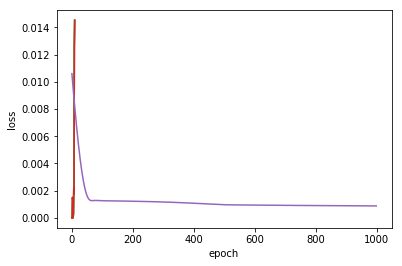

In [128]:
plt.plot(history.history['loss'])
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

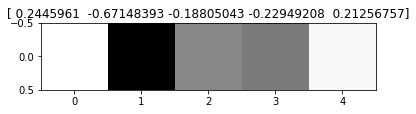

In [129]:
encoder = Model(m.layers[0].input, m.layers[0].output)
encoded_imgs = encoder.predict(X_train)
for i in range(len(encoded_imgs)):
    plt.imshow(encoded_imgs[i].reshape((1, latent_dimension)))
    plt.gray()
plt.title(encoded_imgs[i])
dos_numeros = encoded_imgs[i]
plt.show()

In [23]:
m.save('m.h5')
encoder.save('enc.h5')
decoder.save('dec.h5')

NameError: name 'decoder' is not defined

In [131]:
X_test = X_train
decoded_imgs = m.predict(X_test)

In [132]:
test_straight = X_test.reshape((X_test.shape[0]*X_test.shape[1]))
decoded_straight = decoded_imgs.reshape((decoded_imgs.shape[0]*decoded_imgs.shape[1]))

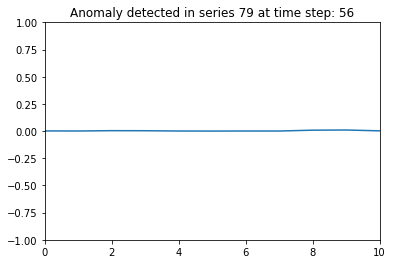

In [138]:
mse = np.square(np.abs(test_straight- decoded_straight))
anomaly = np.argmax(mse)

#if mse[anomaly] > 0.01:
#    plt.title("Anomaly detected in series {} at time step: {}".format(i, anomaly))
plt.plot(mse, label="MSE")
plt.ylim(-1,1)
plt.xlim(0,10)
plt.show()


0.01607616436314957

9